In [3]:
#!pip install --upgrade pandas==2.1
#!pip install sqlalchemy
#!pip3 install PyMySQL

   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.0 kB 320.0 kB/s eta 0:00:01
   --------------------------- ------------ 30.7/45.0 kB 262.6 kB/s eta 0:00:01
   ------------------------------------ --- 41.0/45.0 kB 326.8 kB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 201.9 kB/s eta 0:00:00


## Exploratory Data Analysis for Alcohol 
### Safeen Mridha

#### Link to datasets: 
Alcohol dataset: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/total-(recorded-unrecorded)-alcohol-per-capita-(15-)-consumption
Mortality dataset: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/number-of-deaths-attributed-to-non-communicable-diseases-by-type-of-disease-and-sex 


In [2]:
# setting up and connecting to local sql server
import pandas as pd
import sqlalchemy as sq
from sqlalchemy.sql import text

username = 'root'
password = '1234'
host = 'localhost'  
port = '3306'       
database = 'database'

connection_url = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
engine = sq.create_engine(connection_url)

# test the connection
try:
    with engine.connect() as connection:
        result = connection.execute(text("SELECT DATABASE()"))
        for row in result:
            print("Connected to database:", row[0])
except Exception as e:
    print(f"Error connecting to database: {e}")


Connected to database: database


In [4]:
# loading datasets and renaming columns 
dfAlc = pd.read_csv("Global_Alcohol.csv", encoding='ISO-8859-1')
dfMortality = pd.read_csv("Global_Moratlity.csv", encoding='ISO-8859-1')

dfAlc.rename(columns={"Period":"Year", "FactValueNumeric":"Mean_Alcohol_Value", "FactValueNumericLow":"Alcohol_Value_Low", "FactValueNumericHigh":"Alcohol_Value_High", "Value":"Alcohol_Value_Range", "Parent_Location":"Region", "Location":"Country", "Dim1":"Gender"}, inplace=True)
dfMortality.rename(columns={"Period":"Year", "Dim1":"Gender", "Dim2":"Disease","Location":"Country","FactValueNumeric":"Mortality_Value","FactValueNumericLow":"Mortality_Value_Low","FactValueNumericHigh":"Mortality_Value_High","Value":"Mortality_Value_Range","ParentLocation":"Parent_Location"}, inplace=True)

dfAlc.head()
#dfMortality.head()

,Indicator,ParentLocation,Country,Year,Gender,Mean_Alcohol_Value,Alcohol_Value_Low,Alcohol_Value_High,Alcohol_Value_Range
0,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Afghanistan,2020,Female,0.0,0.0,0.027,0.0 [0.0 - 0.0]
1,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Kuwait,2020,Both sexes,0.0,0.0,0.000,0.0 [0.0 - 0.0]
2,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Kuwait,2020,Female,0.0,0.0,0.000,0.0 [0.0 - 0.0]
3,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Kuwait,2020,Male,0.0,0.0,0.000,0.0 [0.0 - 0.0]
4,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Libya,2020,Female,0.0,0.0,0.036,0.0 [0.0 - 0.0]


In [6]:
# creating alcohol table in sql using alcohol df
AlcoholTable = dfAlc.to_sql("alcohol_levels", engine, index=False, if_exists='replace') 
AlcoholTable = pd.read_sql_table("alcohol_levels", engine)
AlcoholTable 

,Indicator,ParentLocation,Country,Year,Gender,Mean_Alcohol_Value,Alcohol_Value_Low,Alcohol_Value_High,Alcohol_Value_Range
0,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Afghanistan,2020,Female,0.00,0.00,0.027,0.0 [0.0 - 0.0]
1,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Kuwait,2020,Both sexes,0.00,0.00,0.000,0.0 [0.0 - 0.0]
2,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Kuwait,2020,Female,0.00,0.00,0.000,0.0 [0.0 - 0.0]
3,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Kuwait,2020,Male,0.00,0.00,0.000,0.0 [0.0 - 0.0]
4,"Alcohol, total per capita (15+) consumption (i...",Eastern Mediterranean,Libya,2020,Female,0.00,0.00,0.036,0.0 [0.0 - 0.0]
...,...,...,...,...,...,...,...,...,...
11794,"Alcohol, total per capita (15+) consumption (i...",Africa,Eswatini,2000,Both sexes,9.43,6.57,12.470,9.4 [6.6 - 12.5]
11795,"Alcohol, total per capita (15+) consumption (i...",Africa,Gabon,2000,Both sexes,9.64,6.88,12.430,9.6 [6.9 - 12.4]
11796,"Alcohol, total per capita (15+) consumption (i...",Europe,Kyrgyzstan,2000,Male,9.65,6.03,13.680,9.7 [6.0 - 13.7]
11797,"Alcohol, total per capita (15+) consumption (i...",Europe,Poland,2000,Both sexes,9.65,6.46,12.880,9.7 [6.5 - 12.9]


In [8]:
# creating mortality table in sql using mortality df
dfMortality.to_sql("mortality_levels", engine, index=False, if_exists='replace')
MortalityTable = pd.read_sql_table("mortality_levels", engine)
MortalityTable

,Parent_Location,Country,Year,Gender,Disease,Mortality_Value,Mortality_Value_Low,Mortality_Value_High,Mortality_Value_Range
0,South-East Asia,Timor-Leste,2019,Male,Diabetes mellitus,99.53,49.54,167.8,100 [50-168]
1,South-East Asia,Bhutan,2019,Female,Diabetes mellitus,100.20,56.06,163.0,100 [56-163]
2,Europe,Montenegro,2019,Both sexes,Respiratory diseases,100.00,63.92,145.0,100 [64-145]
3,Africa,Seychelles,2019,Male,Malignant neoplasms,99.63,66.17,144.1,100 [66-144]
4,Africa,Lesotho,2019,Male,Diabetes mellitus,1003.00,580.00,1612.0,1003 [580-1612]
...,...,...,...,...,...,...,...,...,...
43915,Western Pacific,Solomon Islands,2000,Male,Respiratory diseases,99.30,55.73,164.5,99 [56-165]
43916,Africa,Seychelles,2000,Female,Cardiovascular diseases,99.05,72.37,128.6,99 [72-129]
43917,Africa,Burkina Faso,2000,Female,Respiratory diseases,990.50,520.40,1683.0,991 [520-1683]
43918,South-East Asia,India,2000,Male,Diabetes mellitus,99704.00,76767.00,124958.0,99704 [76767-124958]


In [32]:
# creating query to investigate the world rank of Canada in terms of alcohol consumption for the year 2018
query_alc_rank_trend = """
WITH Country_Averages AS (
    SELECT
        Country,
        AVG(Mean_Alcohol_Value) AS Average_Alcohol_Value
    FROM
        alcohol_levels
    WHERE
        Gender = 'Both sexes' 
    GROUP BY
        Country
),
Ranked_Countries AS (
    SELECT
        Country,
        Average_Alcohol_Value,
        RANK() OVER (ORDER BY Average_Alcohol_Value DESC) AS Country_Rank
    FROM
        Country_Averages
)

SELECT
    Country,
    Average_Alcohol_Value,
    Country_Rank
FROM
    Ranked_Countries
WHERE 
    Country = 'Canada'
ORDER BY
    Country_Rank DESC;

"""

alc_rank_trend = pd.read_sql_query(query_alc_rank_trend, engine) 
print("Canada's Average Alcohol Rank out of 189 countries between 2000-2018") 
alc_rank_trend

Canada's Average Alcohol Rank out of 189 countries between 2000-2018


,Country,Average_Alcohol_Value,Country_Rank
0,Canada,9.879524,37


In [24]:
# creating query to investigate the world rank of Canada in terms of alcohol consumption for the year 2000
query_alc_trend_2000 = """
WITH RankedAlcohol AS (
    SELECT
        Country,
        Mean_Alcohol_Value,
        RANK() OVER (ORDER BY Mean_Alcohol_Value DESC) AS rank_value
    FROM
        alcohol_levels
    WHERE
        Gender = 'Both sexes' AND Year = 2000
)
SELECT
    Country,
    Mean_Alcohol_Value,
    rank_value
FROM
    RankedAlcohol
WHERE
    Country = 'Canada';
    """
alc_trend_2000 = pd.read_sql_query(query_alc_trend_2000, engine)
print("Canada's Average Alcohol Rank during 2000 out of 189 countries") 
alc_trend_2000

Canada's Average Alcohol Rank during 2000 out of 189 countries


,Country,Mean_Alcohol_Value,rank_value
0,Canada,9.38,40


In [28]:
# creating query to investigate the world rank of Canada in terms of alcohol consumption for the year 2000
query_alc_trend_2018 = """
WITH RankedAlcohol AS (
    SELECT
        Country,
        Mean_Alcohol_Value,
        RANK() OVER (ORDER BY Mean_Alcohol_Value DESC) AS rank_value
    FROM
        alcohol_levels
    WHERE
        Gender = 'Both sexes' AND Year = 2018
)
SELECT
    Country,
    Mean_Alcohol_Value,
    rank_value
FROM
    RankedAlcohol
WHERE
    Country = 'Canada';
    """
alc_trend_2018 = pd.read_sql_query(query_alc_trend_2018, engine)
print("Canada's Average Alcohol Rank during 2018 out of 189 countries") 
alc_trend_2018

Canada's Average Alcohol Rank during 2018 out of 189 countries


,Country,Mean_Alcohol_Value,rank_value
0,Canada,9.9,33


In [111]:
# creating query to investigate the overall world rank of Canada for alcohol consumption for the years 2000-2018
query_alc_rank_trend = """
SELECT
    Country,
    Year,
    Gender,
    Mean_Alcohol_Value,
    Alcohol_Value_Low,	
    Alcohol_Value_High
FROM
    alcohol_levels
WHERE 
    Country = 'Canada' and 
    Gender != "Both sexes"
ORDER BY
    Year DESC;

"""

alc_rank_trend = pd.read_sql_query(query_alc_rank_trend, engine) 
print("Canada's Average Alcohol Rank between 2000 to 2018 out of 189 countries") 
alc_rank_trend

Canada's Average Alcohol Rank between 2000 to 2018 out of 189 countries


,Country,Year,Gender,Mean_Alcohol_Value,Alcohol_Value_Low,Alcohol_Value_High
0,Canada,2020,Male,15.59,10.64,20.70
1,Canada,2020,Female,4.31,2.87,5.67
2,Canada,2019,Male,15.59,10.63,20.50
3,Canada,2019,Female,4.34,2.93,5.78
4,Canada,2018,Male,15.59,10.63,20.50
5,Canada,2018,Female,4.34,2.93,5.78
6,Canada,2017,Male,15.68,10.75,20.68
7,Canada,2017,Female,4.36,2.95,5.82
8,Canada,2016,Male,15.64,10.85,20.75
9,Canada,2016,Female,4.35,2.96,5.84


### Joining Alcohol Dataset With Mortality Dataset

In [97]:
# creating query to investigate trend between Alcohol Usage and Cardiovascular Disease Mortalities between 2000 to 2018
query_alc_join_cardio = """
SELECT 
    alcohol_levels.Country, 
    alcohol_levels.Year, 
    alcohol_levels.Gender,  
    alcohol_levels.Mean_Alcohol_Value AS Alcohol_Value, 
    mortality_levels.Mortality_Value AS mortality_value, 
    mortality_levels.Disease 
FROM 
    alcohol_levels
JOIN 
    mortality_levels 
ON 
    alcohol_levels.Year = mortality_levels.Year AND 
    alcohol_levels.Gender = mortality_levels.Gender AND 
    alcohol_levels.Country = mortality_levels.Country
WHERE 
    alcohol_levels.Country = 'Canada' AND 
    alcohol_levels.Year BETWEEN 2000 AND 2018 AND 
    alcohol_levels.Gender = 'Both sexes' AND 
    mortality_levels.Disease = 'Cardiovascular diseases';
"""

alc_join_cardio = pd.read_sql_query(query_alc_join_cardio, engine) 
alc_join_cardio

,Country,Year,Gender,alcohol_value,mortality_value,Disease
0,Canada,2018,Both sexes,9.90,70147.0,Cardiovascular diseases
1,Canada,2017,Both sexes,9.95,71372.0,Cardiovascular diseases
2,Canada,2016,Both sexes,9.92,69553.0,Cardiovascular diseases
3,Canada,2015,Both sexes,9.92,69548.0,Cardiovascular diseases
4,Canada,2014,Both sexes,9.95,68507.0,Cardiovascular diseases
5,Canada,2013,Both sexes,10.05,67296.0,Cardiovascular diseases
6,Canada,2012,Both sexes,10.10,65860.0,Cardiovascular diseases
7,Canada,2011,Both sexes,10.17,65294.0,Cardiovascular diseases
8,Canada,2010,Both sexes,10.21,66670.0,Cardiovascular diseases
9,Canada,2009,Both sexes,10.23,67611.0,Cardiovascular diseases


In [117]:
# creating query to investigate trend between Alcohol Usage and Respiratory Disease Mortalities between 2000 to 2018
query_alc_join_resp = """
SELECT 
    alcohol_levels.Country, 
    alcohol_levels.Year, 
    alcohol_levels.Gender,  
    alcohol_levels.Mean_Alcohol_Value AS Alcohol_Value, 
    mortality_levels.Mortality_Value AS Mortality_Value, 
    mortality_levels.Disease 
FROM 
    alcohol_levels
JOIN 
    mortality_levels 
ON 
    alcohol_levels.Year = mortality_levels.Year AND 
    alcohol_levels.Gender = mortality_levels.Gender AND 
    alcohol_levels.Country = mortality_levels.Country
WHERE 
    alcohol_levels.Country = 'Canada' AND 
    alcohol_levels.Year BETWEEN 2000 AND 2018 AND 
    alcohol_levels.Gender = 'Both sexes' AND 
    mortality_levels.Disease = 'Respiratory diseases';
"""

alc_join_resp = pd.read_sql_query(query_alc_join_resp, engine) 
alc_join_resp

,Country,Year,Gender,Alcohol_Value,Mortality_Value,Disease
0,Canada,2018,Both sexes,9.90,19700.0,Respiratory diseases
1,Canada,2017,Both sexes,9.95,19973.0,Respiratory diseases
2,Canada,2016,Both sexes,9.92,18990.0,Respiratory diseases
3,Canada,2015,Both sexes,9.92,18873.0,Respiratory diseases
4,Canada,2014,Both sexes,9.95,17989.0,Respiratory diseases
5,Canada,2013,Both sexes,10.05,17848.0,Respiratory diseases
6,Canada,2012,Both sexes,10.10,17670.0,Respiratory diseases
7,Canada,2011,Both sexes,10.17,17578.0,Respiratory diseases
8,Canada,2010,Both sexes,10.21,16903.0,Respiratory diseases
9,Canada,2009,Both sexes,10.23,16665.0,Respiratory diseases


In [119]:
# creating query to investigate trend between Alcohol Usage and Diabetes Mellitus Mortalities between 2000 to 2018
query_alc_join_diab = """
SELECT 
    alcohol_levels.Country, 
    alcohol_levels.Year, 
    alcohol_levels.Gender,  
    alcohol_levels.Mean_Alcohol_Value AS Alcohol_Value, 
    mortality_levels.Mortality_Value AS Mortality_Value, 
    mortality_levels.Disease 
FROM 
    alcohol_levels
JOIN 
    mortality_levels 
ON 
    alcohol_levels.Year = mortality_levels.Year AND 
    alcohol_levels.Gender = mortality_levels.Gender AND 
    alcohol_levels.Country = mortality_levels.Country
WHERE 
    alcohol_levels.Country = 'Canada' AND 
    alcohol_levels.Year BETWEEN 2000 AND 2018 AND 
    alcohol_levels.Gender = 'Both sexes' AND 
    mortality_levels.Disease = 'Diabetes Mellitus';
"""

alc_join_diab = pd.read_sql_query(query_alc_join_diab, engine) 
alc_join_diab

,Country,Year,Gender,Alcohol_Value,Mortality_Value,Disease
0,Canada,2018,Both sexes,9.90,6883.0,Diabetes mellitus
1,Canada,2017,Both sexes,9.95,7002.0,Diabetes mellitus
2,Canada,2016,Both sexes,9.92,6962.0,Diabetes mellitus
3,Canada,2015,Both sexes,9.92,7230.0,Diabetes mellitus
4,Canada,2014,Both sexes,9.95,7091.0,Diabetes mellitus
5,Canada,2013,Both sexes,10.05,7056.0,Diabetes mellitus
6,Canada,2012,Both sexes,10.10,7003.0,Diabetes mellitus
7,Canada,2011,Both sexes,10.17,7232.0,Diabetes mellitus
8,Canada,2010,Both sexes,10.21,6964.0,Diabetes mellitus
9,Canada,2009,Both sexes,10.23,6938.0,Diabetes mellitus


In [125]:
# creating query to investigate trend between Alcohol Usage and Malignant Neoplasm (cancer) Mortalities between 2000 to 2018
query_alc_join_cancer = """
SELECT 
    alcohol_levels.Country, 
    alcohol_levels.Year, 
    alcohol_levels.Gender,  
    alcohol_levels.Mean_Alcohol_Value AS Alcohol_Value, 
    mortality_levels.Mortality_Value AS Mortality_Value, 
    mortality_levels.Disease 
FROM 
    alcohol_levels
JOIN 
    mortality_levels 
ON 
    alcohol_levels.Year = mortality_levels.Year AND 
    alcohol_levels.Gender = mortality_levels.Gender AND 
    alcohol_levels.Country = mortality_levels.Country
WHERE 
    alcohol_levels.Country = 'Canada' AND 
    alcohol_levels.Year BETWEEN 2000 AND 2018 AND 
    alcohol_levels.Gender = 'Both sexes' AND 
    mortality_levels.Disease = 'Malignant neoplasms';
"""

alc_join_cancer = pd.read_sql_query(query_alc_join_cancer, engine) 
alc_join_cancer

,Country,Year,Gender,Alcohol_Value,Mortality_Value,Disease
0,Canada,2018,Both sexes,9.90,80881.0,Malignant neoplasms
1,Canada,2017,Both sexes,9.95,80994.0,Malignant neoplasms
2,Canada,2016,Both sexes,9.92,80696.0,Malignant neoplasms
3,Canada,2015,Both sexes,9.92,78020.0,Malignant neoplasms
4,Canada,2014,Both sexes,9.95,77763.0,Malignant neoplasms
5,Canada,2013,Both sexes,10.05,75755.0,Malignant neoplasms
6,Canada,2012,Both sexes,10.10,74983.0,Malignant neoplasms
7,Canada,2011,Both sexes,10.17,73328.0,Malignant neoplasms
8,Canada,2010,Both sexes,10.21,72535.0,Malignant neoplasms
9,Canada,2009,Both sexes,10.23,71726.0,Malignant neoplasms


In [137]:
### Visualizations

(array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18')])

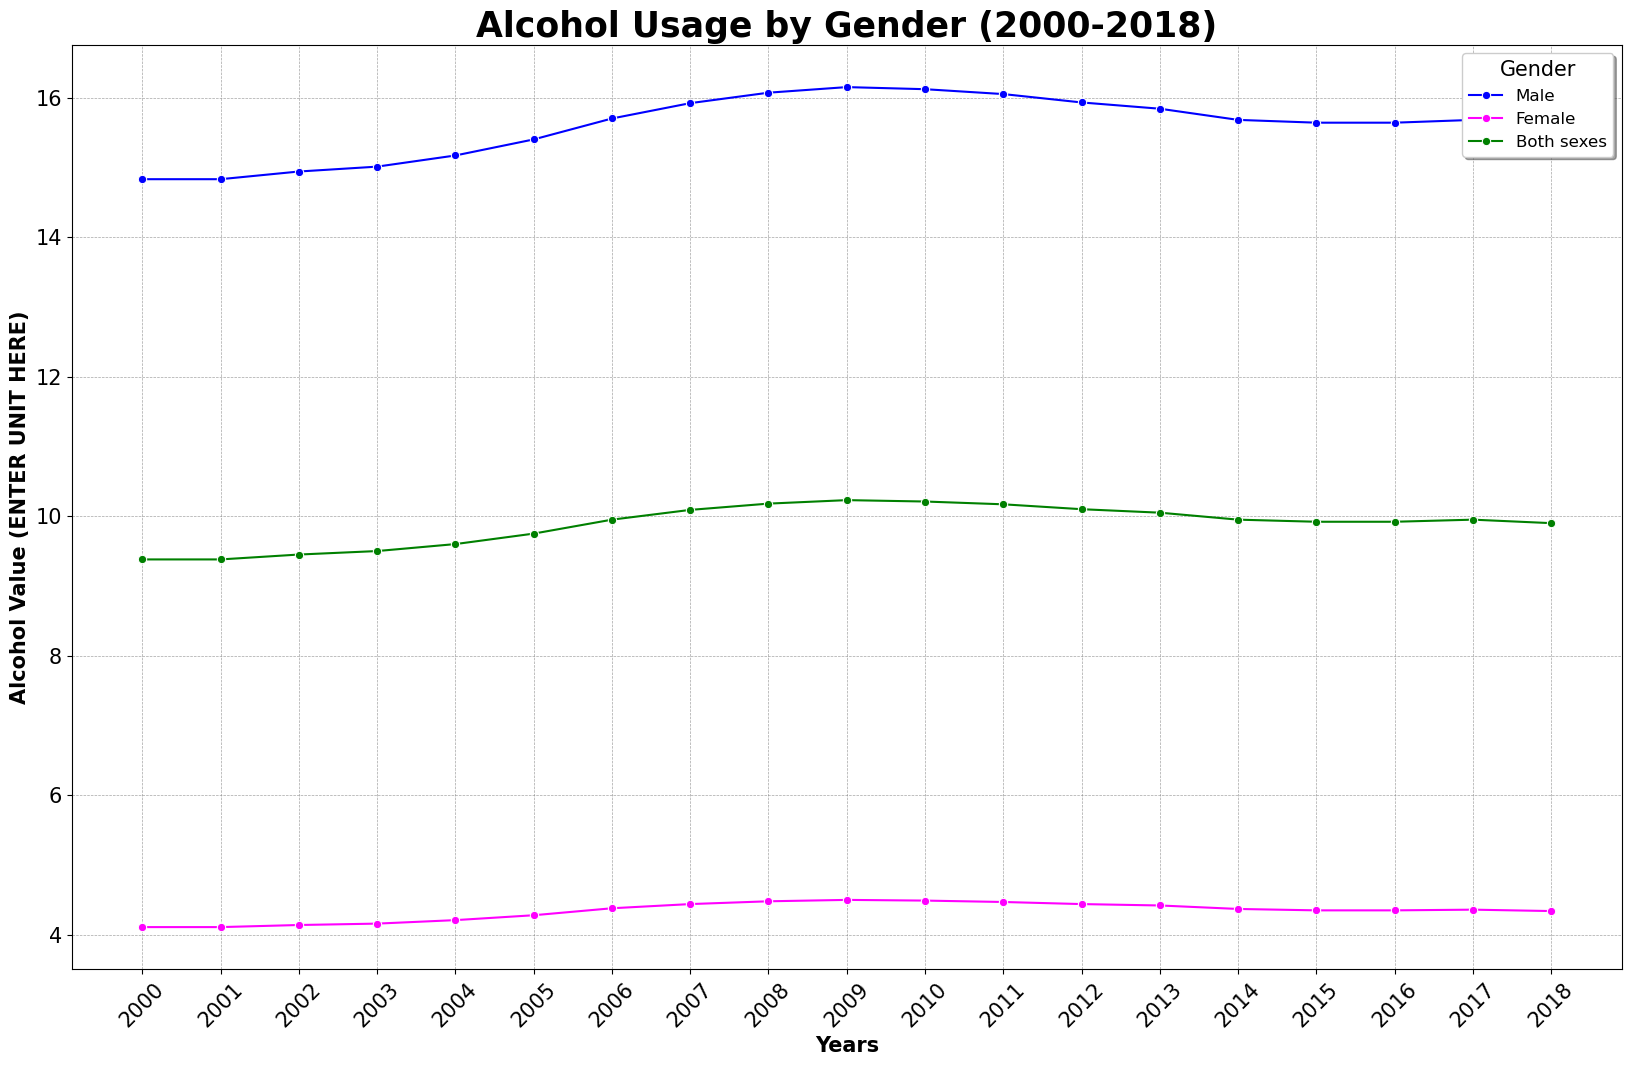

In [147]:
# plotting alcohol trends in Canada from 2000-2018
import seaborn as sns
import matplotlib.pyplot as plt

query_alc_trend_vis = """SELECT Year, Mean_Alcohol_Value, Gender FROM alcohol_levels where Year<=2018 and Year>=2000 and Country='Canada';"""   
trend_alc=pd.read_sql_query(query_alc_trend_vis, engine)
trend_alc['Year'] = trend_alc['Year'].astype(int)
plt.figure(figsize=(20, 12))

sns.lineplot(data=trend_alc, x=trend_alc['Year'], y=trend_alc['Mean_Alcohol_Value'], hue='Gender', marker='o', markersize=6, palette=['Blue','Magenta','Green'])
plt.title("Alcohol Usage by Gender (2000-2018)", fontsize=25, weight='bold')
plt.xlabel("Years", fontsize=15,weight='bold')

# ENTER UNIT HERE
plt.ylabel("Alcohol Value (ENTER UNIT HERE)", fontsize=15, weight='bold')

plt.legend(frameon=True, shadow=True, loc='upper right',fontsize=12,title="Gender", title_fontsize=15)
years = trend_alc['Year'].unique() 
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(years, rotation=45)
plt.xticks(ticks=years, labels=years, rotation=45,fontsize=15)
plt.yticks(fontsize=15)


C:\Users\safmr\AppData\Local\Temp\ipykernel_20224\2526572418.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_alc['Type'] = 'tob_cardio'
C:\Users\safmr\AppData\Local\Temp\ipykernel_20224\2526572418.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resp_alc['Type'] = 'tob_respiratory'
C:\Users\safmr\AppData\Local\Temp\ipykernel_20224\2526572418.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

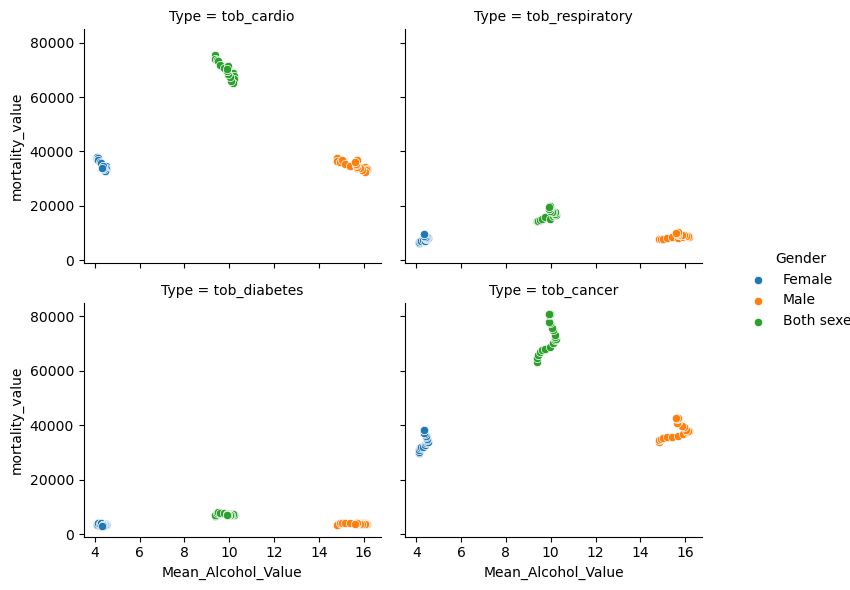

In [158]:
# Correlation between Tobacco and mortality diseases
query = """SELECT 
        alcohol_levels.Country, 
        alcohol_levels.Year, 
        alcohol_levels.Gender, 
        alcohol_levels.Mean_Alcohol_Value, 
        mortality_levels.mortality_value, 
        mortality_levels.Disease 
    FROM 
        alcohol_levels
    JOIN 
        mortality_levels ON alcohol_levels.Year = mortality_levels.Year and
        alcohol_levels.Gender = mortality_levels.Gender and 
        alcohol_levels.Country=mortality_levels.Country
    WHERE 
        alcohol_levels.Country = 'Canada' and 
        alcohol_levels.Year BETWEEN 2000 AND 2018 
    ORDER BY 
        mortality_levels.disease, mortality_levels.Year;"""   

result=pd.read_sql_query(query, engine)
cardio_alc=result[result['Disease']=='Cardiovascular diseases']
resp_alc=result[result['Disease']=='Respiratory diseases']
diabetes_alc=result[result['Disease']=='Diabetes mellitus']
cancer_alc=result[result['Disease']=='Malignant neoplasms']

cardio_alc['Type'] = 'tob_cardio'
resp_alc['Type'] = 'tob_respiratory'
diabetes_alc['Type'] = 'tob_diabetes'
cancer_alc['Type'] = 'tob_cancer' 

# Merge the datasets by concatenating them
combined_data_new = pd.concat([cardio_alc, resp_alc, diabetes_alc, cancer_alc])

g = sns.FacetGrid(combined_data_new, col="Type", hue="Gender", col_wrap=2)  # Wraps the grid into 2 columns
g.map_dataframe(sns.scatterplot, x="Mean_Alcohol_Value", y="mortality_value")
g.add_legend()

g.fig.subplots_adjust(right=1.00)  # Adjusts the plot to make space for the legend

# Alternatively, you can adjust the legend positioning further:
g.legend.set_bbox_to_anchor((1.20, 0.5))  # Moves the legend outside the plot
g.legend.set_frame_on(False)  # Optional: removes the frame around the legend

plt.show()